In [1]:
import numpy as np
import pandas as pd
import xarray as x
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [33]:
data_accf = x.open_dataset("C:/Users/milan/OneDrive - Delft University of Technology/Project_Y2Q3-4/AT20_optimal/DT00/f100___________20180701_0000_accf_gp.nc")
data_accf

<xarray.Dataset>
Dimensions:         (time: 25, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 2018-07-01 2018-07-02 ... 2018-07-25
  * lon             (lon) float32 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lev             (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
  * lat             (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD        (time) float64 ...
    dt              (time) float64 ...
    nstep           (time) float64 ...
    hyam            (lev) float32 ...
    hybm            (lev) float32 ...
    atr20_o3        (time, lev, lat, lon) float32 ...
    atr20_ch4       (time, lev, lat, lon) float32 ...
    atr20_h2o       (time, lev, lat, lon) float32 ...
    atr20_contrail  (time, lev, lat, lon) float32 ...
    atr20_co2       (time, lev, lat, lon) float32 ...
    aps             (time, lat, lon) float32 ...
    time_bnds       (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             accf_gp
    channel_file_type:        output
    channel_file_name:        f100___________20180701_0000_accf_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [32]:
data_ECHAM = x.open_dataset("C:/Users/milan/OneDrive - Delft University of Technology/Project_Y2Q3-4/AT20_optimal/DT00/f100___________20180701_0000_ECHAM5.nc")
data=data_ECHAM.variables
data_ECHAM

<xarray.Dataset>
Dimensions:      (time: 25, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-01 2018-07-02 ... 2018-07-25
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/49)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    channel_io_pe:            0
    channel_time_slo:         171360.0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f100___________20180701_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

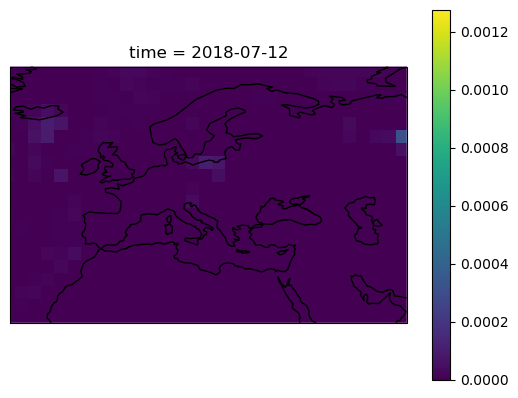

In [35]:
# rain rate
# Unit = kg m-2 s-1

rsfl = data_ECHAM['rsfl_2d'].isel(time=11)
rsfc = data_ECHAM['rsfc_2d'].isel(time=11)

rainr = rsfc + rsfl

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = rainr.plot(transform=ccrs.PlateCarree())

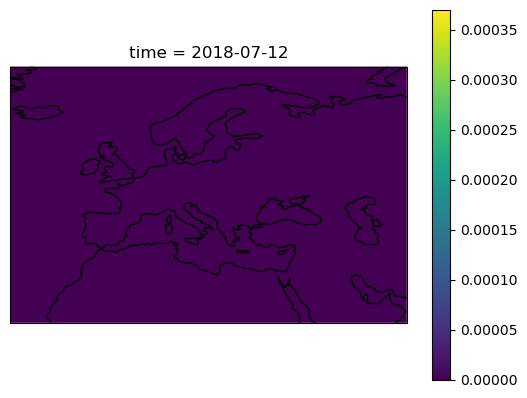

In [36]:
# Snow rate
# Unit = kg m-2 s-1

ssfl = data_ECHAM['ssfl_2d'].isel(time = 11)
ssfc = data_ECHAM['ssfc_2d'].isel(time = 11)
snowr = ssfc + ssfl

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = snowr.plot(transform=ccrs.PlateCarree())

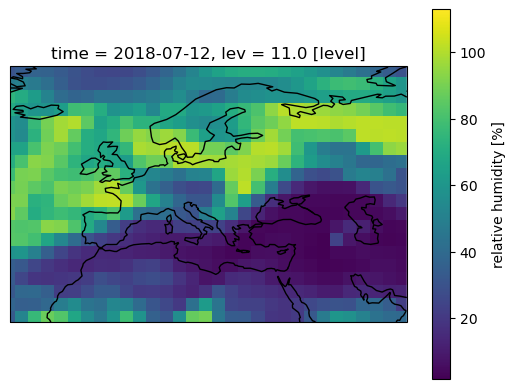

In [37]:
# relative humidity
humidity = data_ECHAM['rhum'].isel(time = 11, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = humidity.plot(transform=ccrs.PlateCarree())

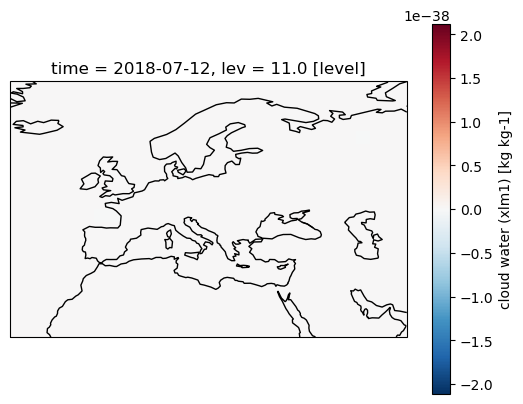

In [38]:
#cloud water
cloudwater = data_ECHAM['xlm1'].isel(time = 11, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = cloudwater.plot(transform=ccrs.PlateCarree())


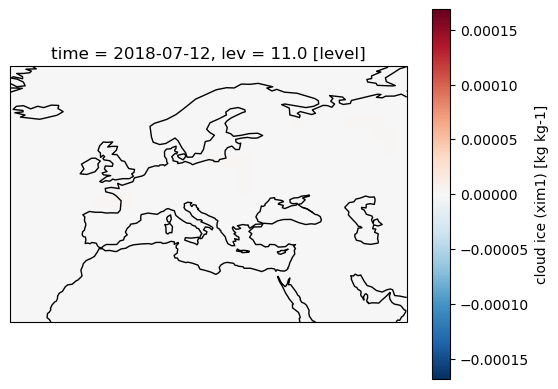

In [39]:
#cloud ice

cloudice = data_ECHAM['xim1'].isel(time = 11, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = cloudice.plot(transform=ccrs.PlateCarree())


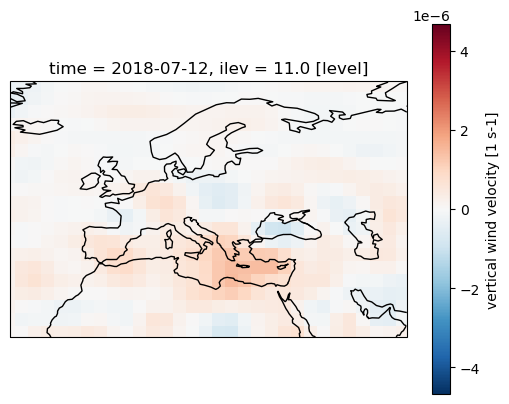

In [40]:
# vertical winds

vertwinds = data_ECHAM['etadot'].isel(time = 11, ilev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = vertwinds.plot(transform=ccrs.PlateCarree())


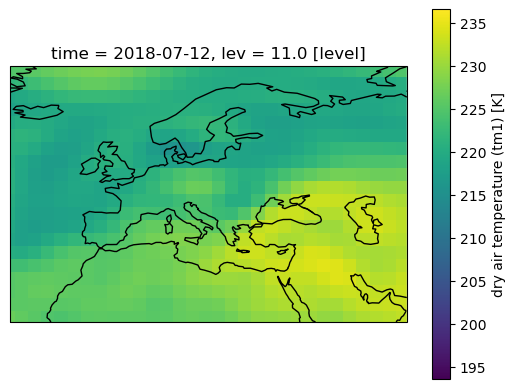

In [41]:
# Dry air temperature

dryair_temp = data_ECHAM['tm1'].isel(time = 11, lev = 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = dryair_temp.plot(transform=ccrs.PlateCarree())

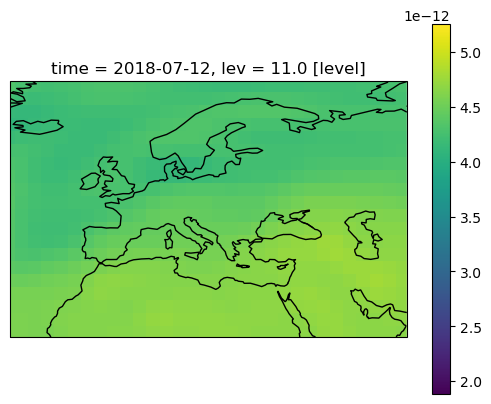

In [42]:
#ATR due to NO2 (K/kg of NO2)

atr_o3 = data_accf['atr20_o3'].isel(time = 11, lev = 10)
atr_ch4 = data_accf['atr20_ch4'].isel(time = 11, lev = 10)

atr_NO2 = atr_ch4 + atr_o3

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

extent = [-25, 60, 20, 70]
ax.set_extent(extent)
p = atr_NO2.plot(transform=ccrs.PlateCarree())




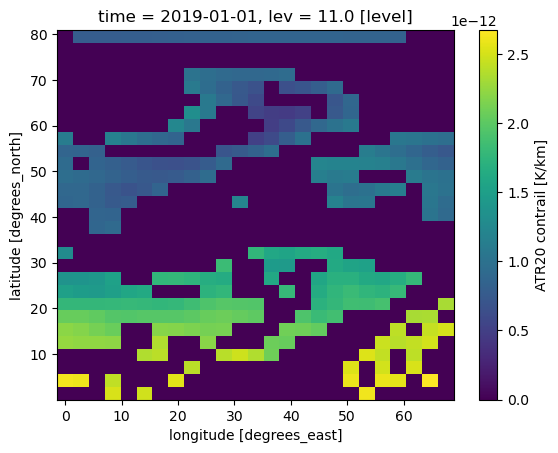

In [12]:
# atr due to contrails

atr_contrails = data_accf['atr20_contrail'].isel(time = 0, lev = 10)
atr_contrailplot = atr_contrails.sel(lat=slice(80., 0.), lon=slice(0, 70)).plot()


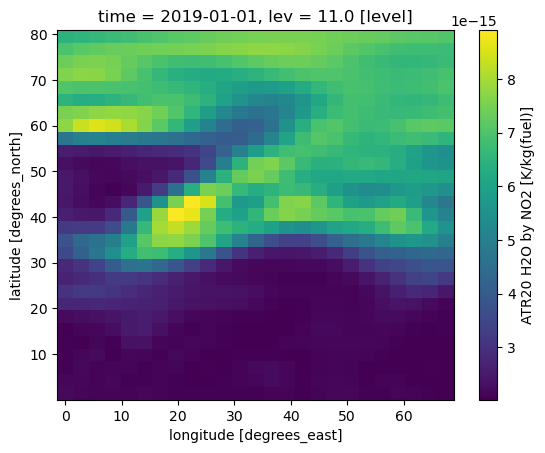

In [13]:
# atr due to water vapor

atr_h2o = data_accf['atr20_h2o'].isel(time = 0, lev = 10)
atr_h2oplot = atr_h2o.sel(lat=slice(80., 0.), lon=slice(0, 70)).plot()

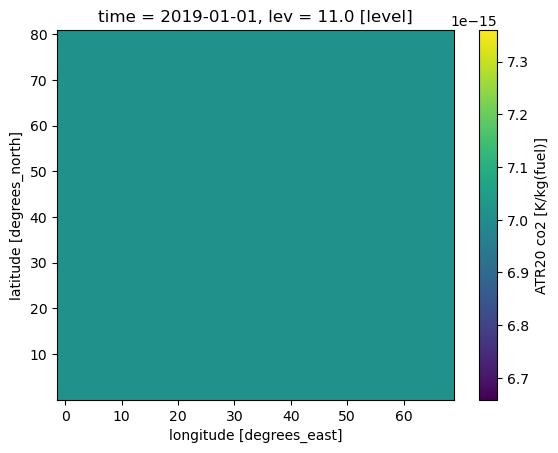

In [16]:
# atr due to co2

atr_co2 = data_accf['atr20_co2'].isel(time = 0, lev = 10)
atr_co2plot = atr_co2.sel(lat=slice(80., 0.), lon=slice(0, 70)).plot()